# 19대 대선 결과 분석

### * Selenium과 Beautiful Soup을 이용한 데이터 획득 준비

In [36]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system, sorry!')
    
plt.rcParams['axes.unicode_minus'] = False

In [37]:
from selenium import webdriver
import time

###### * 크롬 드라이버를 통해 주소 접속

In [38]:
driver = webdriver.Chrome('driver/chromedriver.exe')
driver.get("http://info.nec.go.kr")

###### * 프레임 이동

In [39]:
driver.switch_to_default_content() # 상위 프레임으로 돌아가는 명령어
driver.switch_to_frame('main') 

C:\Users\leebj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: use driver.switch_to.default_content instead
  """Entry point for launching an IPython kernel.
C:\Users\leebj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: use driver.switch_to.frame instead
  


###### * 19대 대통령 선거 개표 결과 웹에서 확인하기

In [41]:
# 역대 선거 -> 투/개표 클릭
driver.find_element_by_xpath("""//*[@id="header"]/ul[1]/li[2]/a""").click()
driver.find_element_by_xpath("""//*[@id="presubmu"]/li[3]/a""").click()

In [42]:
# 개표현황 클릭하기
make_xpath = """//*[@id="header"]/div[4]/ul/li[6]/a"""
driver.find_element_by_xpath(make_xpath).click()

In [43]:
# 대통령선거 클릭하기
driver.find_element_by_xpath("""//*[@id="electionType1"]""").click()

In [44]:
# 19대 대통령선거 드롭다운 선택하기
driver.find_element_by_xpath("""//*[@id="electionName"]/option[2]""").click()

In [46]:
# 대통령선거 드롭다운 클릭하기
driver.find_element_by_xpath("""//*[@id="electionCode"]/option[2]""").click()

In [47]:
# 시/도 리스트 확인하기
sido_list_raw = driver.find_element_by_xpath("""//*[@id="cityCode"]""")
sido_list = sido_list_raw.find_elements_by_tag_name("option")
sido_names_values = [option.text for option in sido_list]
sido_names_values = sido_names_values[1:] # 서울특별시부터~~
sido_names_values

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [48]:
# 웹에서 서울특별시 선택하기
element = driver.find_element_by_id("cityCode")
element.send_keys(sido_names_values[0]) # 0 : 서울, 1 : 부산...

In [49]:
# 시/군 리스트 확인하기
sigun_list_raw = driver.find_element_by_xpath("""//*[@id="townCode"]""")
sigun_list = sigun_list_raw.find_elements_by_tag_name("option")
sigun_names_values = [option.text for option in sigun_list]
sigun_names_values = sigun_names_values[1:]
sigun_names_values
# 서울특별시의 군 리스트가 출력된다.

['종로구',
 '중구',
 '용산구',
 '성동구',
 '광진구',
 '동대문구',
 '중랑구',
 '성북구',
 '강북구',
 '도봉구',
 '노원구',
 '은평구',
 '서대문구',
 '마포구',
 '양천구',
 '강서구',
 '구로구',
 '금천구',
 '영등포구',
 '동작구',
 '관악구',
 '서초구',
 '강남구',
 '송파구',
 '강동구']

In [50]:
# 종로구 선택
element = driver.find_element_by_id("townCode")
element.send_keys(sigun_names_values[0]) # 0 : 종로구, 1 : 중구...

In [51]:
# 검색 버튼 누르기
driver.find_element_by_xpath("""//*[@id="searchBtn"]""").click()

###### * Beautiful Soup으로 데이터 추출하기

In [52]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [53]:
tmp = soup.find_all('td', 'alignR') # td 태그의 alignR 클래스
tmp[1:5]

[<td class="alignR">102,566</td>,
 <td class="alignR">42,512</td>,
 <td class="alignR">22,325</td>,
 <td class="alignR">22,313</td>]

### * 19대 대선 개표 결과 데이터 획득하기

###### * 광역시도 리스트와 시도 리스트를 얻어서 데이터로 만들기

In [54]:
from tqdm import tqdm_notebook

sido_name_list = []
sigun_name_list = []

for sido_value in tqdm_notebook(sido_names_values):
    element = driver.find_element_by_id("cityCode")
    element.send_keys(sido_value)

    time.sleep(1)
    
    sigun_list_raw = driver.find_element_by_xpath("""//*[@id="townCode"]""")
    sigun_list = sigun_list_raw.find_elements_by_tag_name("option")

    sigun_names_values = [option.text for option in sigun_list]
    sigun_names_values = sigun_names_values[1:]

    for sigun_value in sigun_names_values:
        sido_name_list.append(sido_value)
        sigun_name_list.append(sigun_value)

In [55]:
election_result = pd.DataFrame({'광역시도':sido_name_list, '시군':sigun_name_list})

election_result

,광역시도,시군
0,서울특별시,종로구
1,서울특별시,중구
2,서울특별시,용산구
3,서울특별시,성동구
4,서울특별시,광진구
5,서울특별시,동대문구
6,서울특별시,중랑구
7,서울특별시,성북구
8,서울특별시,강북구
9,서울특별시,도봉구


###### * 함수로 득표수 얻는 과정을 만든다. 투표인수, 문재인, 홍준표, 안철수 후보의 득표수 저장

In [56]:
def get_vote_info(n):
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml') # lxml모듈
    
    tmp = soup.find_all('td', 'alignR')
    tmp_values = [float(tmp_val.get_text().replace(',', '')) for tmp_val in tmp[1:5]]
    # get_text() : 글자만 가져오기
    # replace('찾을값', '바꿀값')
    
    pop[n] = tmp_values[0]
    moon[n] = tmp_values[1]
    hong[n] = tmp_values[2]
    ahn[n] = tmp_values[3]

###### * NaN 처리하기

In [57]:
def fail_procedure(n):
    pop[n] = np.nan
    moon[n] = np.nan
    hong[n] = np.nan
    ahn[n] = np.nan

###### * 최종 결과가 저장될 리스트 생성

In [58]:
pop = [np.nan]*len(election_result)
moon = [np.nan]*len(election_result)
hong = [np.nan]*len(election_result)
ahn = [np.nan]*len(election_result)

len(pop), len(moon), len(hong), len(ahn)

(250, 250, 250, 250)

###### * 각 지역 각 후보자에게 투표한 인원 수 정리

In [59]:
for n in tqdm_notebook(election_result.index):
    try:
        element = driver.find_element_by_id("cityCode")
        element.send_keys(election_result['광역시도'][n])
        
        time.sleep(0.5)
        
        element = driver.find_element_by_id("townCode")
        element.send_keys(election_result['시군'][n])
        
        driver.find_element_by_xpath("""//*[@id="spanSubmit"]/input""").click()
        
        time.sleep(0.5)
        
        get_vote_info(n)
        
    except:
        print('--- Error ---')
        fail_procedure(n)

--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Error ---
--- Er

###### * 위 코드에서 에러가 난 부분만 다시 실행

In [99]:
re_try_index = election_result[election_result['pop'].isnull()].index

for n in tqdm_notebook(re_try_index):
    try:
        element = driver.find_element_by_id("cityCode")
        element.send_keys(election_result['광역시도'][n])
        
        time.sleep(0.5)
        
        element = driver.find_element_by_id("townCode")
        element.send_keys(election_result['시군'][n])
        
        driver.find_element_by_xpath("""//*[@id="spanSubmit"]/input""").click()
        
        time.sleep(0.5)
        
        get_vote_info(n)
        
    except:
        print('--- Error ---')
        fail_procedure(n)

###### * 각 지역과 투표 인원 수를 데이터프레임에 저장

In [100]:
election_result['pop'] = pop
election_result['moon'] = moon
election_result['hong'] = hong
election_result['ahn'] = ahn
election_result

,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566.0,42512.0,22325.0,22313.0
1,서울특별시,중구,82852.0,34062.0,17901.0,19372.0
2,서울특별시,용산구,148157.0,58081.0,35230.0,32109.0
3,서울특별시,성동구,203175.0,86686.0,40566.0,45674.0
4,서울특별시,광진구,240030.0,105512.0,46368.0,52824.0
5,서울특별시,동대문구,236092.0,98958.0,51631.0,53359.0
6,서울특별시,중랑구,265706.0,111450.0,56545.0,62778.0
7,서울특별시,성북구,295866.0,129263.0,57584.0,66518.0
8,서울특별시,강북구,210614.0,89645.0,42268.0,51669.0
9,서울특별시,도봉구,229233.0,94898.0,47461.0,55600.0


###### * 결과를 csv로 저장

In [102]:
election_result.to_csv('data/05. election_result.csv', encoding='utf-8', sep=',')

### * 각 후보의 득표율과 지역 ID 정리하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

election_result = pd.read_csv('data/05. election_result.csv', encoding='utf-8', 
                             index_col=0)
election_result.head()

,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566.0,42512.0,22325.0,22313.0
1,서울특별시,중구,82852.0,34062.0,17901.0,19372.0
2,서울특별시,용산구,148157.0,58081.0,35230.0,32109.0
3,서울특별시,성동구,203175.0,86686.0,40566.0,45674.0
4,서울특별시,광진구,240030.0,105512.0,46368.0,52824.0


###### * 광역시도의 이름을 따로 정리한다.

In [2]:
sido_candi = election_result['광역시도']
sido_candi = [name[:2] if name[:2] in ['서울','부산','대구','광주','인천','대전','울산']
             else '' for name in sido_candi]
# 서울특별시, 부산광역시, 경기도...의 리스트 이름 앞 두 글자에
# 서울, 부산, 대구, 광주, 인천, 대전, 울산이 포함되어 있으면 그것으로 다시 정의하고
# 나머지는 '' 으로 정의한다.

###### * 함수 정의 : 위에서 정의한 두 글자 값은 그대로 리턴, 아닌 글자는...?

In [3]:
def cut_char_sigu(name):
    return name if len(name)==2 else name[:-1]

###### * 시군의 이름을 따로 정의한다. 광역시가 아닌데 구를 가지고 있는 시를 정리한다.

In [4]:
import re

sigun_candi = ['']*len(election_result)

for n in election_result.index:
    each = election_result['시군'][n]
    if each[:2] in ['수원','성남','안양','안산','고양','용인','청주','천안','전주','포항','창원']:
        sigun_candi[n] = re.split('시', each)[0]+' '+\
        cut_char_sigu(re.split('시', each)[1])
    else:
        sigun_candi[n] = cut_char_sigu(each)

sigun_candi

['종로',
 '중구',
 '용산',
 '성동',
 '광진',
 '동대문',
 '중랑',
 '성북',
 '강북',
 '도봉',
 '노원',
 '은평',
 '서대문',
 '마포',
 '양천',
 '강서',
 '구로',
 '금천',
 '영등포',
 '동작',
 '관악',
 '서초',
 '강남',
 '송파',
 '강동',
 '중구',
 '서구',
 '동구',
 '영도',
 '부산진',
 '동래',
 '남구',
 '북구',
 '해운대',
 '기장',
 '사하',
 '금정',
 '강서',
 '연제',
 '수영',
 '사상',
 '중구',
 '동구',
 '서구',
 '남구',
 '북구',
 '수성',
 '달서',
 '달성',
 '중구',
 '동구',
 '남구',
 '연수',
 '남동',
 '부평',
 '계양',
 '서구',
 '강화',
 '옹진',
 '동구',
 '서구',
 '남구',
 '북구',
 '광산',
 '동구',
 '중구',
 '서구',
 '유성',
 '대덕',
 '중구',
 '남구',
 '동구',
 '북구',
 '울주',
 '세종특별자치',
 '수원 장안',
 '수원 권선',
 '수원 팔달',
 '수원 영통',
 '성남 수정',
 '성남 중원',
 '성남 분당',
 '의정부',
 '안양 만안',
 '안양 동안',
 '부천',
 '광명',
 '평택',
 '양주',
 '동두천',
 '안산 상록',
 '안산 단원',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '과천',
 '의왕',
 '구리',
 '남양주',
 '오산',
 '화성',
 '시흥',
 '군포',
 '하남',
 '파주',
 '여주',
 '이천',
 '용인 처인',
 '용인 수지',
 '용인 기흥',
 '안성',
 '김포',
 '광주',
 '포천',
 '연천',
 '양평',
 '가평',
 '춘천',
 '원주',
 '강릉',
 '동해',
 '삼척',
 '태백',
 '정선',
 '속초',
 '고성',
 '양양',
 '인제',
 '홍천',
 '횡성',
 '영월',
 '평창',
 '화천',
 '양구

###### * 광역시의 시이름과 구이름을 합침. 세종시는 제외

In [5]:
ID_candi = [sido_candi[n]+' '+sigun_candi[n] for n in range(0,len(sigun_candi))]

ID_candi = [name[1:] if name[0]==' ' else name for name in ID_candi]
ID_candi = [name[:2] if name[:2]=='세종' else name for name in ID_candi]
# 세종시의 경우는 제외

ID_candi

['서울 종로',
 '서울 중구',
 '서울 용산',
 '서울 성동',
 '서울 광진',
 '서울 동대문',
 '서울 중랑',
 '서울 성북',
 '서울 강북',
 '서울 도봉',
 '서울 노원',
 '서울 은평',
 '서울 서대문',
 '서울 마포',
 '서울 양천',
 '서울 강서',
 '서울 구로',
 '서울 금천',
 '서울 영등포',
 '서울 동작',
 '서울 관악',
 '서울 서초',
 '서울 강남',
 '서울 송파',
 '서울 강동',
 '부산 중구',
 '부산 서구',
 '부산 동구',
 '부산 영도',
 '부산 부산진',
 '부산 동래',
 '부산 남구',
 '부산 북구',
 '부산 해운대',
 '부산 기장',
 '부산 사하',
 '부산 금정',
 '부산 강서',
 '부산 연제',
 '부산 수영',
 '부산 사상',
 '대구 중구',
 '대구 동구',
 '대구 서구',
 '대구 남구',
 '대구 북구',
 '대구 수성',
 '대구 달서',
 '대구 달성',
 '인천 중구',
 '인천 동구',
 '인천 남구',
 '인천 연수',
 '인천 남동',
 '인천 부평',
 '인천 계양',
 '인천 서구',
 '인천 강화',
 '인천 옹진',
 '광주 동구',
 '광주 서구',
 '광주 남구',
 '광주 북구',
 '광주 광산',
 '대전 동구',
 '대전 중구',
 '대전 서구',
 '대전 유성',
 '대전 대덕',
 '울산 중구',
 '울산 남구',
 '울산 동구',
 '울산 북구',
 '울산 울주',
 '세종',
 '수원 장안',
 '수원 권선',
 '수원 팔달',
 '수원 영통',
 '성남 수정',
 '성남 중원',
 '성남 분당',
 '의정부',
 '안양 만안',
 '안양 동안',
 '부천',
 '광명',
 '평택',
 '양주',
 '동두천',
 '안산 상록',
 '안산 단원',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '과천',
 '의왕',
 '구리',
 '남양주',
 '오산',
 '화성',
 '시흥',
 '군포',
 '하남'

###### * 투표 결과 표의 새로운 컬럼을 만든다.

In [6]:
election_result['ID'] = ID_candi
election_result.head()

,광역시도,시군,pop,moon,hong,ahn,ID
0,서울특별시,종로구,102566.0,42512.0,22325.0,22313.0,서울 종로
1,서울특별시,중구,82852.0,34062.0,17901.0,19372.0,서울 중구
2,서울특별시,용산구,148157.0,58081.0,35230.0,32109.0,서울 용산
3,서울특별시,성동구,203175.0,86686.0,40566.0,45674.0,서울 성동
4,서울특별시,광진구,240030.0,105512.0,46368.0,52824.0,서울 광진


###### * 각 후보의 득표수(moon, hong, ahn)에서 총 투표자수(pop)을 나눠서 득표율을 구한다.

In [7]:
election_result[['rate_moon','rate_hong','rate_ahn']] = \
election_result[['moon','hong','ahn']].div(election_result['pop'], axis=0)
election_result[['rate_moon','rate_hong','rate_ahn']] *= 100
election_result.head()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
0,서울특별시,종로구,102566.0,42512.0,22325.0,22313.0,서울 종로,41.448433,21.766472,21.754773
1,서울특별시,중구,82852.0,34062.0,17901.0,19372.0,서울 중구,41.111862,21.605996,23.381451
2,서울특별시,용산구,148157.0,58081.0,35230.0,32109.0,서울 용산,39.202333,23.778829,21.672280
3,서울특별시,성동구,203175.0,86686.0,40566.0,45674.0,서울 성동,42.665682,19.966039,22.480128
4,서울특별시,광진구,240030.0,105512.0,46368.0,52824.0,서울 광진,43.957839,19.317585,22.007249


###### * 문재인 후보 득표율 내림차순

In [8]:
election_result.sort_values('rate_moon', ascending=False).head(10)

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
182,전라남도,순천시,181451.0,122595.0,4525.0,40429.0,순천,67.563695,2.493786,22.280946
166,전라북도,전주시덕진구,187921.0,125375.0,5183.0,40188.0,전주 덕진,66.716865,2.758074,21.385582
165,전라북도,전주시완산구,236383.0,157637.0,7003.0,50506.0,전주 완산,66.687114,2.962565,21.366173
175,전라북도,장수군,16079.0,10714.0,717.0,3353.0,장수,66.633497,4.459233,20.853287
184,전라남도,광양시,96384.0,63544.0,4100.0,20080.0,광양,65.927955,4.253818,20.833333
173,전라북도,진안군,18107.0,11918.0,819.0,3904.0,진안,65.819849,4.523113,21.560722
172,전라북도,완주군,62470.0,41057.0,2107.0,13897.0,완주,65.722747,3.372819,22.245878
168,전라북도,익산시,192208.0,123422.0,6470.0,45737.0,익산,64.212728,3.366145,23.795576
170,전라북도,남원시,55371.0,35539.0,1939.0,13854.0,남원,64.183417,3.501833,25.020317
63,광주광역시,광산구,248209.0,159119.0,3630.0,65402.0,광주 광산,64.106862,1.462477,26.349568


###### * 홍준표 후보 득표율 내림차순

In [9]:
election_result.sort_values('rate_hong', ascending=False).head(10)

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
219,경상북도,군위군,17627.0,2251.0,11651.0,1939.0,군위,12.770182,66.097464,11.000170
220,경상북도,의성군,37855.0,5365.0,23790.0,4767.0,의성,14.172500,62.845067,12.592788
223,경상북도,영덕군,26125.0,3786.0,16314.0,3231.0,영덕,14.491866,62.445933,12.367464
247,경상남도,합천군,33021.0,7143.0,19699.0,3077.0,합천,21.631689,59.655976,9.318313
216,경상북도,고령군,22396.0,3754.0,13248.0,2600.0,고령,16.761922,59.153420,11.609216
213,경상북도,예천군,32124.0,5261.0,18863.0,4427.0,예천,16.377163,58.719338,13.780974
215,경상북도,청도군,30398.0,5323.0,17678.0,3654.0,청도,17.511020,58.155142,12.020528
221,경상북도,청송군,18418.0,3218.0,10669.0,2387.0,청송,17.472038,57.927028,12.960148
240,경상남도,창녕군,42878.0,10310.0,24464.0,3877.0,창녕,24.044965,57.054900,9.041933
212,경상북도,문경시,49113.0,8616.0,27832.0,6905.0,문경,17.543217,56.669314,14.059414


###### * 안철수 후보 득표율 내림차순

In [10]:
election_result.sort_values('rate_ahn', ascending=False).head(10)

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
196,전라남도,진도군,21189.0,10392.0,511.0,8855.0,진도,49.044315,2.411629,41.790552
201,전라남도,신안군,28950.0,14370.0,713.0,12000.0,신안,49.637306,2.462867,41.450777
193,전라남도,강진군,25175.0,12476.0,753.0,10152.0,강진,49.557100,2.991063,40.325720
195,전라남도,해남군,48351.0,25901.0,1158.0,18157.0,해남,53.568696,2.394987,37.552481
197,전라남도,영암군,36402.0,18999.0,825.0,13610.0,영암,52.192187,2.266359,37.388056
180,전라남도,목포시,145476.0,77896.0,2584.0,53303.0,목포,53.545602,1.776238,36.640408
59,광주광역시,동구,66287.0,37053.0,1308.0,23438.0,광주 동구,55.897838,1.973238,35.358366
192,전라남도,장흥군,27149.0,14821.0,636.0,9593.0,장흥,54.591329,2.342628,35.334635
190,전라남도,보성군,29967.0,16666.0,732.0,10514.0,보성,55.614509,2.442687,35.085260
198,전라남도,무안군,52516.0,29516.0,983.0,18052.0,무안,56.203824,1.871810,34.374286


###### * 전국 지도 불러오기

In [11]:
draw_korea = pd.read_csv('data/05. draw_korea.csv', encoding='ANSI', index_col=0)
draw_korea.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


###### * draw_korea의 ID와 election_result의 ID는 일치해야 한다. 이 둘의 차집합을 구해서 공집합이면 일치한다고 볼 수 있다.

In [12]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())
# unique() : ndarray형태로 겹치는 값 없이 나타내준다.
# set : 집합자료형
# {'고성(강원)', '고성(경남)', '부천 소사', '부천 오정', '부천 원미', '창원 합포', '창원 회원'}
# 이외에는 일치하는 것이다.

{'고성(강원)', '고성(경남)', '부천 소사', '부천 오정', '부천 원미', '창원 합포', '창원 회원'}

In [13]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

{'고성', '부천', '창원 마산합포', '창원 마산회원'}

In [14]:
election_result[election_result['ID'] == '고성']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
125,강원도,고성군,18692.0,5664.0,6511.0,3964.0,고성,30.301733,34.833084,21.206933
233,경상남도,고성군,34603.0,9848.0,16797.0,4104.0,고성,28.459960,48.542034,11.860243


###### * 강원도 고성과 경남 고성을 구분한다.

In [15]:
election_result.loc[125, 'ID'] = '고성(강원)'
election_result.loc[233, 'ID'] = '고성(경남)'

election_result[election_result['시군'] == '고성군']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
125,강원도,고성군,18692.0,5664.0,6511.0,3964.0,고성(강원),30.301733,34.833084,21.206933
233,경상남도,고성군,34603.0,9848.0,16797.0,4104.0,고성(경남),28.459960,48.542034,11.860243


###### * 창원시 마산합포구, 마산회원구 -> 창원 합포, 창원 회원

In [16]:
election_result.loc[228, 'ID'] = '창원 합포'
election_result.loc[229, 'ID'] = '창원 회원'

election_result[election_result['광역시도'] == '경상남도']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
226,경상남도,창원시의창구,164047.0,60757.0,56887.0,22830.0,창원 의창,37.036337,34.677257,13.916743
227,경상남도,창원시성산구,153327.0,63717.0,42052.0,22923.0,창원 성산,41.556282,27.426350,14.950400
228,경상남도,창원시마산합포구,119281.0,35592.0,54488.0,14686.0,창원 합포,29.838784,45.680368,12.312103
229,경상남도,창원시마산회원구,136757.0,45014.0,56340.0,17744.0,창원 회원,32.915317,41.197160,12.974839
230,경상남도,창원시진해구,114779.0,41249.0,40049.0,17435.0,창원 진해,35.937759,34.892271,15.190061
231,경상남도,진주시,222813.0,73929.0,93751.0,26687.0,진주,33.179841,42.076091,11.977308
232,경상남도,통영시,82855.0,25477.0,36128.0,10738.0,통영,30.748899,43.603886,12.959990
233,경상남도,고성군,34603.0,9848.0,16797.0,4104.0,고성(경남),28.459960,48.542034,11.860243
234,경상남도,사천시,71555.0,22370.0,32475.0,8350.0,사천,31.262665,45.384669,11.669345
235,경상남도,김해시,318253.0,147972.0,82880.0,45126.0,김해,46.495084,26.042174,14.179285


In [17]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

{'부천'}

In [18]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

{'부천 소사', '부천 오정', '부천 원미'}

###### * 부천시는 투표 당시 구가 사라져서 지도의 ID와는 차이가 있다. 그냥 구의 값을 3으로 나눠서 진행한다. 각 후보의 투표율을 제외한 모든 데이터를 3으로 나누면 된다.

In [19]:
election_result[election_result['시군'] == '부천시']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
85,경기도,부천시,543777.0,239697.0,100544.0,128297.0,부천,44.080018,18.489932,23.593679


###### * 부천시의 각 구를 새롭게 삽입한다.

In [20]:
moon_tmp = election_result.loc[85, 'moon']/3
hong_tmp = election_result.loc[85, 'hong']/3
ahn_tmp = election_result.loc[85, 'ahn']/3
pop_tmp = election_result.loc[85, 'pop']/3

rate_moon_tmp = election_result.loc[85, 'rate_moon']
rate_hong_tmp = election_result.loc[85, 'rate_hong']
rate_ahn_tmp = election_result.loc[85, 'rate_ahn']

election_result.loc[250] = ['경기도', '부천시', pop_tmp, moon_tmp, hong_tmp, ahn_tmp,
                           '부천 소사', rate_moon_tmp, rate_hong_tmp, rate_ahn_tmp]
election_result.loc[251] = ['경기도', '부천시', pop_tmp, moon_tmp, hong_tmp, ahn_tmp,
                           '부천 오정', rate_moon_tmp, rate_hong_tmp, rate_ahn_tmp]
election_result.loc[252] = ['경기도', '부천시', pop_tmp, moon_tmp, hong_tmp, ahn_tmp,
                           '부천 원미', rate_moon_tmp, rate_hong_tmp, rate_ahn_tmp]
election_result.tail()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
248,제주특별자치도,제주시,273163.0,125717.0,48027.000000,55971.000000,제주,46.022704,17.581810,20.489964
249,제주특별자치도,서귀포시,101296.0,43776.0,20036.000000,21890.000000,서귀포,43.215922,19.779656,21.609935
250,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 소사,44.080018,18.489932,23.593679
251,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 오정,44.080018,18.489932,23.593679
252,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 원미,44.080018,18.489932,23.593679


In [21]:
election_result[election_result['시군'] == '부천시']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
85,경기도,부천시,543777.0,239697.0,100544.000000,128297.000000,부천,44.080018,18.489932,23.593679
250,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 소사,44.080018,18.489932,23.593679
251,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 오정,44.080018,18.489932,23.593679
252,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 원미,44.080018,18.489932,23.593679


###### * 부천시 데이터는 삭제한다.

In [22]:
election_result.drop([85], inplace=True)
election_result[election_result['시군'] == '부천시']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
250,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 소사,44.080018,18.489932,23.593679
251,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 오정,44.080018,18.489932,23.593679
252,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 원미,44.080018,18.489932,23.593679


###### * 두 변수의 ID 데이터가 일치한다.

In [23]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

set()

###### * 투표 데이터와 지도 데이터를 병합한다.

In [24]:
final_elect_data = pd.merge(election_result, draw_korea, how='left', on=['ID'])
final_elect_data.head()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn,y,x
0,서울특별시,종로구,102566.0,42512.0,22325.0,22313.0,서울 종로,41.448433,21.766472,21.754773,4,6
1,서울특별시,중구,82852.0,34062.0,17901.0,19372.0,서울 중구,41.111862,21.605996,23.381451,5,6
2,서울특별시,용산구,148157.0,58081.0,35230.0,32109.0,서울 용산,39.202333,23.778829,21.672280,6,6
3,서울특별시,성동구,203175.0,86686.0,40566.0,45674.0,서울 성동,42.665682,19.966039,22.480128,5,7
4,서울특별시,광진구,240030.0,105512.0,46368.0,52824.0,서울 광진,43.957839,19.317585,22.007249,6,7


In [25]:
final_elect_data['moon_vs_hong'] = election_result['rate_moon'] - election_result['rate_hong']
final_elect_data['moon_vs_ahn'] = election_result['rate_moon'] - election_result['rate_ahn']
final_elect_data['hong_vs_ahn'] = election_result['rate_hong'] - election_result['rate_ahn']

final_elect_data.tail()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn,y,x,moon_vs_hong,moon_vs_ahn,hong_vs_ahn
247,제주특별자치도,제주시,273163.0,125717.0,48027.000000,55971.000000,제주,46.022704,17.581810,20.489964,25,5,-38.024288,12.313376,50.337664
248,제주특별자치도,서귀포시,101296.0,43776.0,20036.000000,21890.000000,서귀포,43.215922,19.779656,21.609935,26,5,28.440894,25.532741,-2.908154
249,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 소사,44.080018,18.489932,23.593679,4,2,23.436266,21.605986,-1.830280
250,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 오정,44.080018,18.489932,23.593679,6,2,25.590086,20.486339,-5.103747
251,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 원미,44.080018,18.489932,23.593679,5,2,25.590086,20.486339,-5.103747


In [26]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
    [(27,5), (27,6), (25,6)],
]

In [27]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

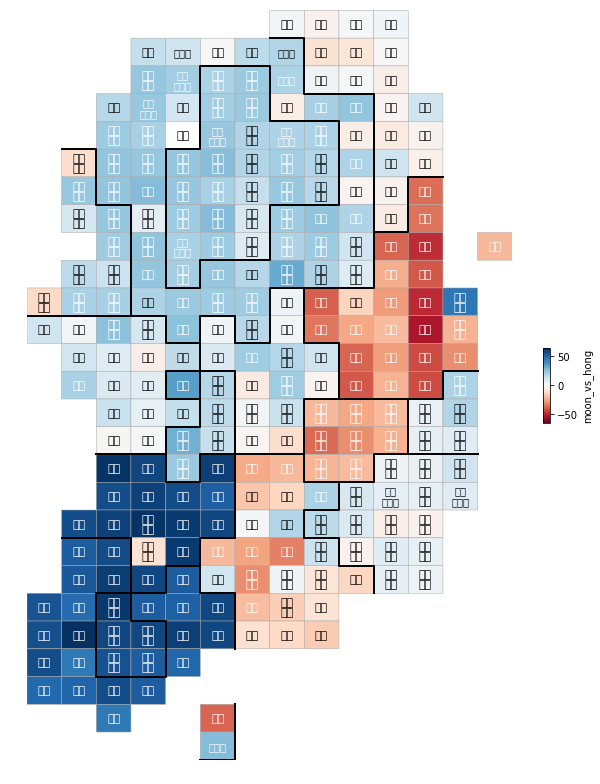

In [28]:
drawKorea('moon_vs_hong', final_elect_data, 'RdBu')

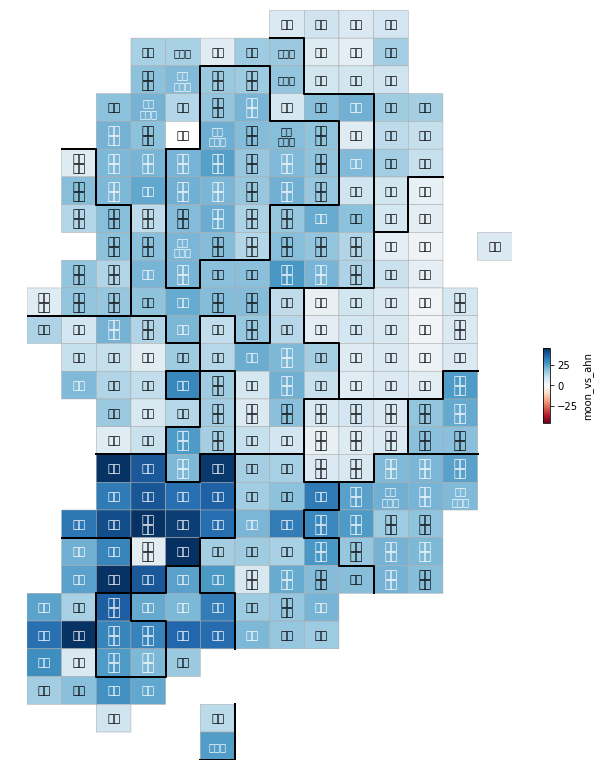

In [29]:
drawKorea('moon_vs_ahn', final_elect_data, 'RdBu')

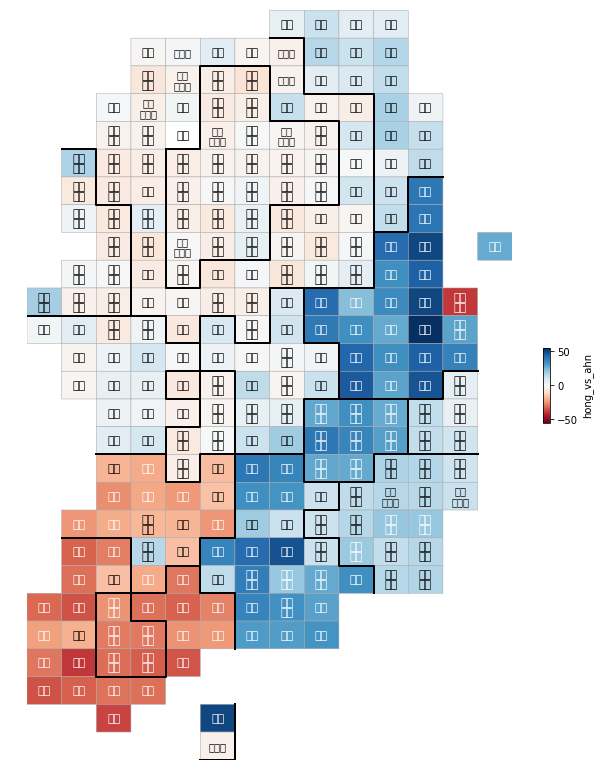

In [30]:
drawKorea('hong_vs_ahn', final_elect_data, 'RdBu')

In [31]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [32]:
pop_folium = final_elect_data.set_index('ID')

del pop_folium['광역시도']
del pop_folium['시군']

pop_folium.head()

,pop,moon,hong,ahn,rate_moon,rate_hong,rate_ahn,y,x,moon_vs_hong,moon_vs_ahn,hong_vs_ahn
ID,,,,,,,,,,,,
서울 종로,102566.0,42512.0,22325.0,22313.0,41.448433,21.766472,21.754773,4,6,19.681961,19.693661,0.011700
서울 중구,82852.0,34062.0,17901.0,19372.0,41.111862,21.605996,23.381451,5,6,19.505866,17.730411,-1.775455
서울 용산,148157.0,58081.0,35230.0,32109.0,39.202333,23.778829,21.672280,6,6,15.423503,17.530053,2.106549
서울 성동,203175.0,86686.0,40566.0,45674.0,42.665682,19.966039,22.480128,5,7,22.699643,20.185554,-2.514089
서울 광진,240030.0,105512.0,46368.0,52824.0,43.957839,19.317585,22.007249,6,7,24.640253,21.950590,-2.689664


###### * 문재인 후보 대 홍준표 후보 득표율 비교

In [36]:
geo_path = 'data/05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=6)
map.choropleth(geo_data = geo_str,
              data = pop_folium['moon_vs_hong'],
              columns = [pop_folium.index, pop_folium['moon_vs_hong']],
              fill_color = 'PuBu',
              key_on = 'feature.id')

map